## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pickle

with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_model = KMeans(n_clusters=4, random_state=17).fit(X)

score = silhouette_score(X, kmeans_model.labels_)

print("Качество кластеризации по метрике силуэтта %.3f" % score)

Качество кластеризации по метрике силуэтта 0.439


Качество кластеризации по метрике силуэтта с двумя кластерами было 0.447. Значит два кластера лучше, чем четыре, но оба варианта кластеризации не очень хороши (значение по метрике меньше 0.5)


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [6]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

score = adjusted_mutual_info_score(Y, kmeans_model.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике AMI %.3f" % score)

Качество кластеризации по метрике AMI 0.582


Качество кластеризации по метрике AMI на трёх кластерах было 0.614. Следовательно качество кластеризации по метрике AMI для количества кластеров 4 хуже, чем при k=3


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [40]:
import pandas as pd
df = pd.read_csv('7.10_clustering_hw.csv')
df

,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1
3,3.127358,1.927986,0
4,-0.817259,6.759974,1
...,...,...,...
295,0.863590,4.798039,1
296,4.451104,2.183275,0
297,7.530399,8.261081,2
298,0.103995,5.893627,1


In [18]:
X = df[['x1', 'x2']]
Y = df['y']

In [29]:
df_test = df.sort_values('x1')
df_test[df_test['x1'] > 4.95]

,x1,x2,y
141,5.004907,8.199382,2
182,5.254943,2.514727,0
147,5.270834,2.232125,0
208,5.321591,8.424216,2
200,5.331972,2.785355,0
...,...,...,...
78,9.059899,7.113337,2
121,9.063588,7.165025,2
98,9.081065,8.307936,2
153,9.119544,8.905285,2


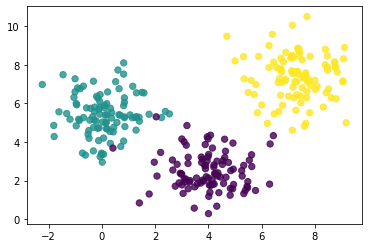

In [20]:
plt.scatter(X['x1'], X['x2'], s=40, c=Y, marker='o', alpha=0.8)
plt.show()

In [14]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances

metrics = []
MAX_CLUSTERS = 10
for cluster_num in range(1, MAX_CLUSTERS + 1):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=17).fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)

cluster_num 1, metric 135.92762259869988
cluster_num 2, metric 92.34245055263459
cluster_num 3, metric 74.52323397050206
cluster_num 4, metric 60.9002322627054
cluster_num 5, metric 54.73583484692996
cluster_num 6, metric 49.876555897409276
cluster_num 7, metric 47.81045416520256
cluster_num 8, metric 43.44451243654671
cluster_num 9, metric 41.48778468633232
cluster_num 10, metric 38.39432720403249


best cluster num: 2


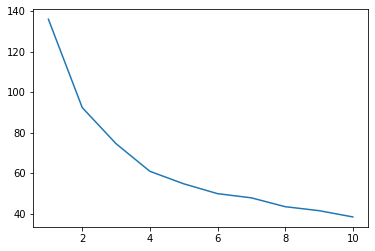

In [15]:
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

In [17]:
# Я не очень поняла, почему лучшее количество кластеров 2 в данном случае. Интуитивно больше похоже на 4

In [21]:
kmeans_model = KMeans(n_clusters=2, random_state=17).fit(X)

In [22]:
kmeans_model.labels_

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [39]:
kmeans_model.labels_[df[(round(df['x1'], 0) == 5) & (round(df['x2']) == 8)].index]

array([0, 0])

In [38]:
kmeans_model.labels_[df[(round(df['x1'], 0) == 0) & (round(df['x2']) == 5)].index]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Точки относятся к разным кластерам**

In [41]:
score = adjusted_mutual_info_score(Y, kmeans_model.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике AMI %.3f" % score)

Качество кластеризации по метрике AMI 0.698


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)